In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db1 = pd.read_pickle('namus_html1.pkl')
db2 = pd.read_pickle('namus_html2.pkl')

In [3]:
dbs = [db1, db2]
namus = pd.concat(dbs)
print(namus.shape)

(10529, 72)


In [4]:
print(namus.sex.value_counts())
print(namus.sex.unique())
print(namus.race.value_counts())
print(namus.case_status.value_counts())

Male      7815
Female    2194
Unsure     518
             2
dtype: int64
['Male' 'Female' 'Unsure' '']
White                     5357
Unsure                    2001
Black/African American    1838
Other                     1006
Asian                      216
Native American             89
                            22
dtype: int64
Unidentified           10527
Unidentified Living        2
dtype: int64


**Prepare target variable: `'CASE_RATING'`**

In [5]:
namus.case_rating.unique()

array(['Medium - High', 'High', 'Medium', 'Extremely Low', 'Low',
       'Low - Medium'], dtype=object)

In [6]:
namus['rating'] = namus.case_rating.map({'Extremely Low':0, 'Low':1, 'Low - Medium': 2,'Medium':3, 'Medium - High':4,
                                        'High':5, })

In [7]:
namus.rating.unique()

array([4, 5, 3, 0, 1, 2])

In [8]:
namus.groupby('rating').mean()

,all_parts_recovered,amputations,artificial_parts_aids,deformities,finger_toe_nails,foreign_objects,head_not_recovered,images,medical_implants,n-hands_not_recovered,n-limbs_not_recovered,organ_absent,other_distinctive_features,other_medical_information,piercings,prior_surgery,scars_and_marks,skeletal_findings,tattoos,torso_not_recovered
rating,,,,,,,,,,,,,,,,,,,,
0,0.699620,0.005703,0.001901,0.007605,0.009506,0.003802,0.020913,0.077947,0.005703,0.098859,0.115970,0.011407,0.001901,0.017110,0.005703,0.009506,0.163498,0.047529,0.117871,0.060837
1,0.427235,0.002079,0.001040,0.004158,0.000000,0.001040,0.175676,0.219335,0.005198,0.371102,0.380457,0.001040,0.020790,0.038462,0.001040,0.006237,0.015593,0.036383,0.007277,0.305613
2,0.753049,0.009146,0.005335,0.013720,0.010671,0.008384,0.067073,0.628811,0.019055,0.127287,0.116616,0.044207,0.049543,0.053354,0.025152,0.028963,0.291159,0.079268,0.121189,0.054116
3,0.612403,0.010078,0.006718,0.011370,0.014470,0.005426,0.098966,0.797416,0.018088,0.253747,0.256331,0.015504,0.065375,0.069251,0.020155,0.042636,0.149096,0.114987,0.079587,0.174419
4,0.500000,0.006773,0.007362,0.020024,0.011484,0.005595,0.044170,1.328033,0.022968,0.362780,0.340106,0.012367,0.042108,0.047998,0.020907,0.029446,0.122497,0.214075,0.051237,0.199647
5,0.928726,0.004320,0.008639,0.012959,0.030238,0.010799,0.000000,3.157667,0.019438,0.017279,0.006479,0.017279,0.075594,0.041037,0.064795,0.058315,0.347732,0.116631,0.168467,0.000000


##Data Exploration and Feature Re-coding

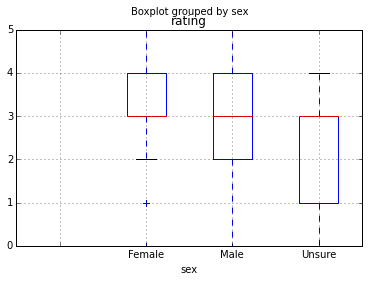

In [9]:
namus.boxplot(column='rating', by='sex')

Looks like **`'sex'`** may be important, but how to code it will take some thought. I'll come back to this one after some more classes...

Since **`'images'`** is neatly coded as a count, and I consider images to be crucial in the identification potential, I wanted to see how the number of images available relates to a rating potential score:

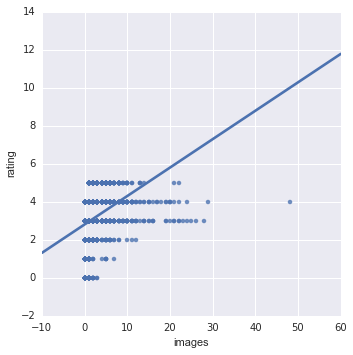

In [10]:
import seaborn as sns
sns.lmplot(x='images', y='rating', data=namus, ci=None)

Looks pretty good: more images do seem to be associated with a higher rating.

Next comes other forensic essentials: **DNA**, **Fingerprints** and **Dental**:

**`'DNA'`**

In [11]:
namus.dna.unique()

array(['Sample submitted - Tests complete',
       'Samples submitted - Tests not complete',
       'Complete - Insufficient DNA for profiling',
       'No DNA information is currently available',
       'Sample is currently not available',
       'Sample available - Not yet submitted'], dtype=object)

**DNA** was recoded to `'1'` for `'available`' and `'0'` for `'not available'`

In [12]:
namus['_dna'] = namus.dna.map({'Sample submitted - Tests complete':1,
                              'Samples submitted - Tests not complete':1,
                              'Complete - Insufficient DNA for profiling':0,
                              'No DNA information is currently available':0,
                              'Sample is currently not available':0,
                              'Sample available - Not yet submitted':1})

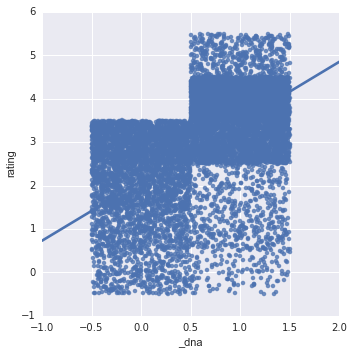

In [13]:
sns.lmplot(x='_dna', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)   #TONS of jitter hahaha

**`'FINGERPRINTS'`**

In [14]:
namus.fingerprints.unique()

array(['Fingerprint information is currently not available',
       'Fingerprint information is available and entered',
       'Fingerprint information is available elsewhere',
       'No fingerprint information is currently available'], dtype=object)

**Fingerprints** were recoded to `'1'` for `'available'` and `'0'` for `'not available'`

In [15]:
namus['_fingerprints'] = namus.fingerprints.map({'Fingerprint information is currently not available':0,
                                                'Fingerprint information is available and entered':1,
                                                'Fingerprint information is available elsewhere':1,
                                                'No fingerprint information is currently available':0})

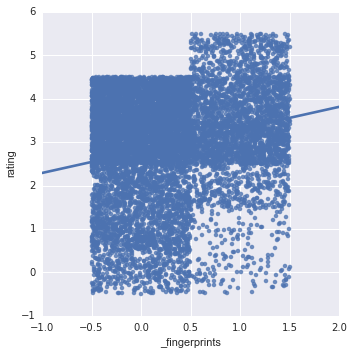

In [16]:
sns.lmplot(x='_fingerprints', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)   #TONS of jitter hahaha

**`'DENTAL'`**

In [17]:
namus.dental.unique()

array(['Dental information / charting is available and entered',
       'Dental information / charting is currently not available',
       'Dental information / charting is available and will be entered later',
       'No dental information is currently available.'], dtype=object)

**Dental** was recoded to `'1'` for `'available'` and `'0'` for `'not available'`

In [18]:
namus['_dental'] = namus.dental.map({'Dental information / charting is available and entered':1,
                                   'Dental information / charting is available and will be entered later':1,
                                   'Dental information / charting is currently not available':0,
                                   'No dental information is currently available.':0})

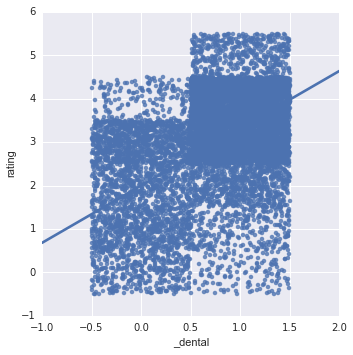

In [19]:
sns.lmplot(x='_dental', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)   #TONS of jitter hahaha

* **Interim conclusion: Having `'DNA'`, `'Dental'` and `'Fingerprints'` from the UP appear to be associated with higher ID Potential. These should be in an initial model, together with `'Images'`**

**`'RECOGNIZABLE_FACE'`** could be safely assumed to be essential to successfully identifiying an UP. 

In [20]:
namus.recognizable_face.unique()

array(['Not recognizable - Partial skeletal parts only',
       'Not recognizable - Decomposing/putrefaction', 'Recognizable face',
       'Not recognizable - Near complete or complete skeleton',
       'Not recognizable - Mummified',
       'Not recognizable - Partial remains with soft tissues',
       'Not recognizable - Traumatic injuries',
       'Not recognizable - Charred/burned', '',
       'Not recognizable - Insect/animal activity'], dtype=object)

**`'recognizable_face'`** was recoded to `'1'` for `'recognizable'` and `'0'` for `'not recognizable'`

In [21]:
namus['_face'] = namus.recognizable_face.map({'Not recognizable' : 0,
                                             'Recognizable face':1})

In [22]:
namus._face.unique()

array([ nan,   1.])

In [23]:
namus._face.fillna(0, inplace=True)

In [24]:
namus._face.unique()

array([ 0.,  1.])

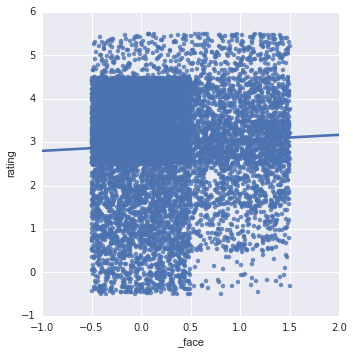

In [25]:
sns.lmplot(x='_face', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)   #TONS of jitter hahaha

Surprisingly to me, **`'_face'`** does not appear to have a strong relationship with **`'rating'`**

**`'LEFT_EYE_COLOR'`** & **`'RIGHT_EYE_COLOR'`**

My assumptions here are that identifying natural eye color would contribute to the identifiability of an UP.

In [26]:
namus.left_eye_color.value_counts()

Unknown or Missing    4701
Brown                 2696
                      2557
Blue                   297
Hazel                  149
Gray                    67
Green                   33
Black                   26
Pink                     3
dtype: int64

In [27]:
namus[namus.left_eye_color == 'Pink'].eye_description

1441                  Pink
5450    eyes not recovered
2000                      
Name: eye_description, dtype: object

Because some of these colors are unnatural (like **`'Pink'`**), I decided to code colors as `'1'` for '`Natural - present'` and `'0'` for `'Unnatural - absent'`. `'Unknown or Missing'` and `''` were also recoded to `'0'`.

In [28]:
namus[namus.left_eye_color == 'Pink'].right_eye_color

1441                  Pink
5450    Unknown or Missing
2000    Unknown or Missing
Name: right_eye_color, dtype: object

In [29]:
namus['l_eye'] = namus.left_eye_color.map({'': 0,
                                           'Unknown or Missing': 0,
                                           'Blue': 1,
                                           'Brown':1,
                                           'Hazel':1,
                                           'Gray':1,
                                           'Green':1,
                                           'Black':1,
                                           'Pink':0})

In [30]:
namus.right_eye_color.value_counts()

Unknown or Missing    4679
Brown                 2696
                      2578
Blue                   293
Hazel                  150
Gray                    65
Green                   34
Black                   27
Pink                     5
Maroon                   2
dtype: int64

In [31]:
namus[namus.right_eye_color == 'Pink'].eye_description

1441       Pink
3382    Unknown
5950           
6451    Unknown
2113           
Name: eye_description, dtype: object

**`'Maroon'`** seems to be an unusual color. To determine if it could result from a natural rich brown color, I checked the eye description and the color of the left eye. 

In [32]:
namus[namus.right_eye_color == 'Maroon'].eye_description

5301    
6934    
Name: eye_description, dtype: object

In [33]:
namus[namus.right_eye_color == 'Maroon'].left_eye_color

5301    Brown
6934    Brown
Name: left_eye_color, dtype: object

Being that there is no description, and the left eye is decribed as brown, I feel it likely that **`'Maroon'`** is not natural, and therefore will be coded `'0'`.

In [34]:
namus[namus.right_eye_color == 'Pink'].left_eye_color

1441                  Pink
3382    Unknown or Missing
5950    Unknown or Missing
6451    Unknown or Missing
2113    Unknown or Missing
Name: left_eye_color, dtype: object

In [35]:
namus['r_eye'] = namus.right_eye_color.map({'': 0,
                                           'Unknown or Missing': 0,
                                           'Blue': 1,
                                           'Brown':1,
                                           'Hazel':1,
                                           'Gray':1,
                                           'Green':1,
                                           'Black':1,
                                           'Pink':0,
                                           'Maroon':0})

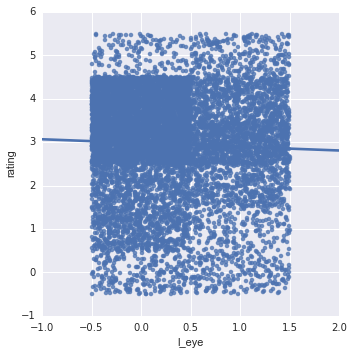

In [36]:
sns.lmplot(x='l_eye', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)

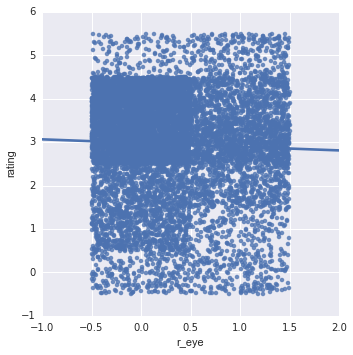

In [37]:
sns.lmplot(x='r_eye', y='rating', data=namus, ci=None, x_jitter=0.5, y_jitter=0.5)

* **Interesting that availability of eye color appears to be negatively associated with ID potential (rating). A model will be testing with and without these features...**

**`'AGE'`**

**`'Estimated_age'`** does not appear to be very useful. Very vague...

In [38]:
namus.est_age.unique()

array(['Adult - Pre 60', 'Adult - Pre 40', 'Adult - Pre 20',
       'Adult - Pre 70', 'Adult - Pre 80', 'Adult', 'Adult - Pre 50',
       'Adult - Pre 30', 'Adolescent', 'Cannot Determine',
       'Adult - Pre 90', 'Infant', 'Fetus', '', 'PreAdolescent',
       'Late Teen/Young Adult'], dtype=object)

All the observations for **`'min_age'`** have **'`years'`** which is great as I wont need to recode to months or days. However, it _is_ apparent that some observations do not have a value at all - only **`'years'`**. Will have to `'fillna'`. Same for **`'max_age'`**

In [39]:
namus.min_age.unique()

array(['45 years', '20 years', '14 years', '35 years', '30 years',
       '50 years', '16 years', '55 years', '25 years', '40 years',
       '19 years', '24 years', '18 years', '12 years', '23 years',
       '17 years', '56 years', '28 years', '37 years', '26 years',
       '60 years', '70 years', '15 years', '22 years', '38 years',
       '34 years', '0 years', '33 years', '21 years', '46 years',
       '36 years', '65 years', '27 years', '32 years', '29 years',
       '10 years', '41 years', '54 years', '11 years', '67 years',
       '66 years', '49 years', '59 years', '44 years', '48 years',
       '31 years', '68 years', '51 years', '47 years', '58 years',
       '39 years', '73 years', '13 years', '42 years', '64 years',
       '43 years', '5 years', '2 years', '1 years', 'years', '53 years',
       '3 years', '63 years', '62 years', '71 years', '52 years',
       '8 years', '75 years', '61 years', '57 years', '4 years',
       '74 years', '80 years', '9 years', '6 years', '69 yea

In [40]:
namus.max_age.unique()

array(['60 years', '40 years', '25 years', '65 years', '50 years',
       '80 years', '99 years', '35 years', '45 years', '55 years',
       '34 years', '30 years', '16 years', '57 years', '70 years',
       '22 years', '36 years', '59 years', '78 years', '85 years',
       '75 years', '18 years', '39 years', '20 years', '28 years',
       '95 years', '32 years', '17 years', '1 years', '24 years',
       '0 years', '43 years', '29 years', '19 years', '46 years',
       '21 years', '90 years', '48 years', '42 years', '66 years',
       '64 years', '31 years', '38 years', '26 years', '27 years',
       '100 years', '68 years', '49 years', '71 years', '5 years',
       '77 years', '23 years', '69 years', '33 years', '37 years',
       '52 years', '44 years', '56 years', '58 years', '79 years',
       '51 years', '47 years', '73 years', '41 years', '76 years',
       '53 years', '61 years', '63 years', '62 years', '11 years',
       '4 years', '3 years', '54 years', 'years', '87 years', '6

Once these is cleaned up to a continuous variable (should be easy), I'll check the relationship between min- and max-age with ID potential (`'rating'`). If information accuracy is important in determining the IP potential, then the certainty of age estimation - i.e. the _difference_ between min and max age might be more important than the age itself. Therefore, **`'age_range'`** might be a good engineered feature. 

In [41]:
namus['_min_age'] = namus['min_age'].map(lambda x: x.rstrip('years'))
namus['_max_age'] = namus['max_age'].map(lambda x: x.rstrip('years'))

In [42]:
import numpy as np

namus._min_age.replace('', np.nan, inplace=True)
namus._max_age.replace('', np.nan, inplace=True)
namus['_min_age'] = namus._min_age.astype('float')
namus['_max_age'] = namus._max_age.astype('float')

In [43]:
namus._max_age.unique()

array([  60.,   40.,   25.,   65.,   50.,   80.,   99.,   35.,   45.,
         55.,   34.,   30.,   16.,   57.,   70.,   22.,   36.,   59.,
         78.,   85.,   75.,   18.,   39.,   20.,   28.,   95.,   32.,
         17.,    1.,   24.,    0.,   43.,   29.,   19.,   46.,   21.,
         90.,   48.,   42.,   66.,   64.,   31.,   38.,   26.,   27.,
        100.,   68.,   49.,   71.,    5.,   77.,   23.,   69.,   33.,
         37.,   52.,   44.,   56.,   58.,   79.,   51.,   47.,   73.,
         41.,   76.,   53.,   61.,   63.,   62.,   11.,    4.,    3.,
         54.,   nan,   87.,   67.,   72.,   74.,    2.,   15.,   84.,
          8.,   12.,    7.,   14.,   88.,    6.,   89.,   10.,    9.,
         13.,   83.])

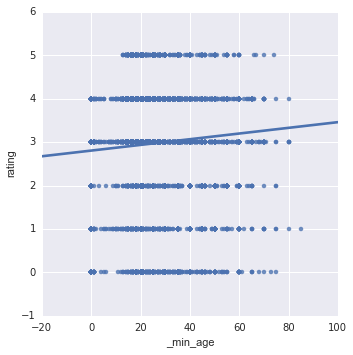

In [44]:
sns.lmplot(x='_min_age', y='rating', data=namus, ci=None)

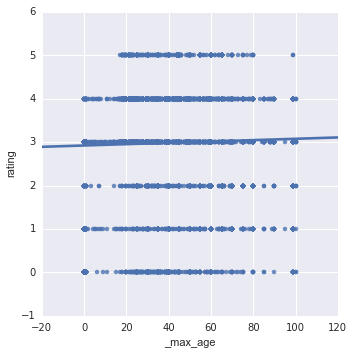

In [45]:
sns.lmplot(x='_max_age', y='rating', data=namus, ci=None)

** *`'_min_age'` and `'_max_age'` both suggest that the older the age, the higher the ID Potential. Odd. But lets try `'age_range'`, since that seems to make more sense considering the idea that information _accuracy_ is what is important**

In [46]:
namus['age_range'] = namus._max_age.subtract(namus._min_age)

**_Somehow_** there are negative numbers in the data! gah!

In [47]:
namus.age_range.unique()

array([ 15.,  20.,  11.,  30.,  83.,  10.,   5.,  21.,   7.,  40.,   4.,
        25.,  34.,   8.,   9.,  45.,  27.,   6.,  32.,  17.,  18.,  81.,
        49.,  14.,   3.,  16.,  59.,  50.,  79.,  22.,   2.,  42.,  35.,
        52.,  12.,  31.,   1.,   0.,  39.,  26.,  46.,  13.,  37.,  56.,
        24.,  19.,  62.,  23.,  41.,  29.,  43.,  36.,  28.,  99.,  nan,
        54.,  60.,  57.,  98.,  47.,  74.,  58.,  44.,  64.,  55.,  -9.,
        77.,  69.,  70., -30.,  51.,  85.,  48.,  33.,  82., -25.,  84.,
        72.,  65.,  75.,  80.,  87.,  90.,  53.,  71.,  88.,  38.])

* **Again, being certain of age does not appear to be strongly related to ID potential. But at least the trend is in an expected direction: a larger range is associated with a lower ID potential rating**

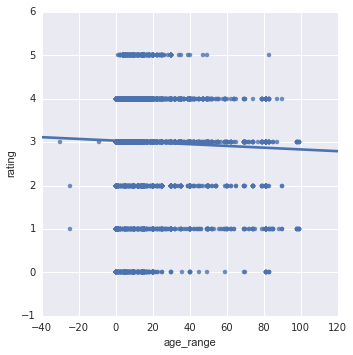

In [48]:
sns.lmplot(x='age_range', y='rating', data=namus, ci=None)

**`'WEIGHT'` & `'HEIGHT'` optionally continuous or categorical variables**

In [49]:
namus.weight.unique()

array([',\n\t\t\t\t\tCannot Estimate', ',\n\t\t\t\t\tEstimated',
       '103,\n\t\t\t\t\tMeasured', '112,\n\t\t\t\t\tMeasured',
       '185,\n\t\t\t\t\tEstimated', '120,\n\t\t\t\t\tMeasured',
       '146,\n\t\t\t\t\tEstimated', '163,\n\t\t\t\t\tEstimated',
       '159,\n\t\t\t\t\tMeasured', '225,\n\t\t\t\t\tEstimated',
       '130,\n\t\t\t\t\tEstimated', '172,\n\t\t\t\t\tMeasured',
       '140,\n\t\t\t\t\tMeasured', '100,\n\t\t\t\t\tMeasured',
       '220,\n\t\t\t\t\tEstimated', '143,\n\t\t\t\t\tMeasured',
       '119,\n\t\t\t\t\tMeasured', ',', '190,\n\t\t\t\t\tEstimated',
       '145,\n\t\t\t\t\tEstimated', '168,\n\t\t\t\t\tMeasured',
       '160,\n\t\t\t\t\tMeasured', '132,\n\t\t\t\t\tMeasured',
       '150,\n\t\t\t\t\tMeasured', '152,\n\t\t\t\t\tMeasured',
       '149,\n\t\t\t\t\tMeasured', '130,\n\t\t\t\t\tMeasured',
       '123,\n\t\t\t\t\tMeasured', '106,\n\t\t\t\t\tMeasured',
       '146,\n\t\t\t\t\tMeasured', '93,\n\t\t\t\t\tMeasured',
       '126,\n\t\t\t\t\tMeasured', '117,\

In [50]:
namus.height.unique()

array(['64,\n\t\t\t\t\tEstimated', '66,\n\t\t\t\t\tEstimated',
       '62,\n\t\t\t\t\tMeasured', '66,\n\t\t\t\t\tMeasured',
       '72,\n\t\t\t\t\tEstimated', '67,\n\t\t\t\t\tMeasured',
       '63,\n\t\t\t\t\tMeasured', '69,\n\t\t\t\t\tMeasured',
       '70,\n\t\t\t\t\tEstimated', '62,\n\t\t\t\t\tEstimated',
       '75,\n\t\t\t\t\tMeasured', '74,\n\t\t\t\t\tEstimated',
       '65,\n\t\t\t\t\tMeasured', '64,\n\t\t\t\t\tMeasured',
       '68,\n\t\t\t\t\tEstimated', '59,\n\t\t\t\t\tMeasured',
       '61,\n\t\t\t\t\tEstimated', '72,\n\t\t\t\t\tMeasured',
       '77,\n\t\t\t\t\tMeasured', '60,\n\t\t\t\t\tEstimated',
       '67,\n\t\t\t\t\tEstimated', '70,\n\t\t\t\t\tMeasured',
       '68,\n\t\t\t\t\tMeasured', '57,\n\t\t\t\t\tCannot Estimate',
       '59,\n\t\t\t\t\tEstimated', '69,\n\t\t\t\t\tEstimated',
       '73,\n\t\t\t\t\tEstimated', '61,\n\t\t\t\t\tMeasured',
       '65,\n\t\t\t\t\tEstimated', '60,\n\t\t\t\t\tMeasured',
       '63,\n\t\t\t\t\tEstimated', '71,\n\t\t\t\t\tMeasured',
  

##Modelling attempt 1: Linear Regression with Simplest Feature Subset

In [51]:
#  Create features for linear regression: all features consisting of an integer. All binary except `images`
linreg_features = ['all_parts_recovered',
                  'amputations',
                  'artificial_parts_aids',
                  'deformities',
                  'finger_toe_nails',
                  'foreign_objects',
                  'head_not_recovered',
                   'images',
                  'medical_implants',
                  'n-hands_not_recovered',
                  'n-limbs_not_recovered',
                  'organ_absent',
                  'other_distinctive_features',
                  'other_medical_information',
                  'piercings',
                  'prior_surgery',
                  'scars_and_marks',
                  'skeletal_findings',
                  'tattoos',
                  'torso_not_recovered']


In [52]:
X = namus[linreg_features]
y = namus.rating

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

## This doesnt work - get "ValueError: Can't handle mix of multiclass and continuous"
from sklearn import metrics
y_pred_class = linreg.predict(X_test)
#print(metrics.accuracy_score(y_test, y_pred_class))

* **However, running it for RMSE _does_ work...so...**

In [53]:
from sklearn.cross_validation import train_test_split

def train_test_rmse(linreg_features):
    X = namus[linreg_features]
    y = namus.rating
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

*  **Using just the simplest model where I have binary features directly from the HTML plus count of images, we get an RSME of 1.166**

In [54]:
train_test_rmse(linreg_features)

1.1365536957868492

* **Next, testing the Null:**

In [55]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 2.96126092,  2.96126092,  2.96126092, ...,  2.96126092,
        2.96126092,  2.96126092])

* **We see that the Null RSME is higher then in my model, at 1.193, meaning that my simple model might be better than the Null. I need to test more models (including / excluding different features) and run more tests (eg k-fold and accuracy). **

In [56]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.1927825446899545

##Modelling attempt 2+: Linear Regression with Simplest Feature Subset

**Below are more models including/excluding different Features based on their relationship with `'rating'` or ID Potential. Features were assessed using `sns.lmplot(x='FEATURE', y='rating', data=namus, ci=None, x_jitter=0.05, y_jitter=0.05)`, and how they related is stored in the `'xlsx'` file [data_details](data_details.xlsx)**

**Below is after adding:**
* **`'_face'`** from `'recognizable_face'`
* **`'_fingerprints'`** from `'fingerprints'`
* **`'_dna'`** from `'dna'`
* **`'_dental'`** from `'dental'`

In [57]:
#  Create features for linear regression: all features consisting of an integer
linreg_features2 = ['all_parts_recovered',
                  'amputations',
                   '_face',
                  'artificial_parts_aids',
                  'deformities',
                  'finger_toe_nails',
                  'foreign_objects',
                  'head_not_recovered',
                  'images',
                  'medical_implants',
                  'n-hands_not_recovered',
                  'n-limbs_not_recovered',
                  'organ_absent',
                  'other_distinctive_features',
                  'other_medical_information',
                  'piercings',
                  'prior_surgery',
                  'scars_and_marks',
                  'skeletal_findings',
                  'tattoos',
                  'torso_not_recovered',
                  '_fingerprints',
                  '_dna',
                  '_dental']

In [58]:
train_test_rmse(linreg_features2)

0.82174918683900189

**After adding features for `'linreg_features2'`, this model took _out_ some features:**

* **`'all_parts_recovered'`**
* **`'other_medical_information'`**
* **`'tattoos'`**
* **`'torso_not_recovered'`**

In [59]:
#  Create features for linear regression: all features consisting of an integer
linreg_features3 = ['amputations',
                   '_face',
                  'artificial_parts_aids',
                  'deformities',
                  'finger_toe_nails',
                  'foreign_objects',
                  'head_not_recovered',
                  'images',
                  'medical_implants',
                  'n-hands_not_recovered',
                  'n-limbs_not_recovered',
                  'organ_absent',
                  'other_distinctive_features',
                  'piercings',
                  'prior_surgery',
                  'scars_and_marks',
                  'skeletal_findings',
                  '_fingerprints',
                  '_dna',
                  '_dental']

**Best model so far, with an RMSE of 0.82**

In [60]:
train_test_rmse(linreg_features3)

0.82146721627396879

In [61]:
X = namus[linreg_features3]
y = namus.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [62]:
#  Create features for linear regression: all features consisting of an integer
linreg_features4 = [
                  'artificial_parts_aids',
                  'deformities',
                  'finger_toe_nails',
                  'foreign_objects',
                  'head_not_recovered',
                  'images',
                  'medical_implants',
                  'organ_absent',
                  'other_distinctive_features',
                  'piercings',
                  'prior_surgery',
                  'skeletal_findings',
                  '_fingerprints',
                  '_dna',
                  '_dental']

In [63]:
train_test_rmse(linreg_features4)

0.82501587291254774

In [64]:
#  Create features for linear regression: all features consisting of an integer
linreg_features5 = [
                  'artificial_parts_aids',
                  'deformities',
                  'finger_toe_nails',
                  'foreign_objects',
                  'head_not_recovered',
                  'images',
                  'medical_implants',
                  'organ_absent',
                  'other_distinctive_features',
                  'piercings',
                  'prior_surgery',
                  'skeletal_findings',
                  '_fingerprints',
                  '_dna',
                  '_dental',
                    'l_eye',
                    'r_eye']

In [65]:
train_test_rmse(linreg_features5)

0.82545830084031446

In [66]:
#  Create features for linear regression: all features consisting of an integer
linreg_features6 = [
                  'artificial_parts_aids',
                  'deformities',
                  'finger_toe_nails',
                  'foreign_objects',
                  'head_not_recovered',
                  'images',
                  'medical_implants',
                  'organ_absent',
                  'other_distinctive_features',
                  'piercings',
                  'prior_surgery',
                  'skeletal_findings',
                  '_fingerprints',
                  '_dna',
                  '_dental',
                  'l_eye',
                  'r_eye',
                  'age_range']

In [67]:
train_test_rmse(linreg_features6)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').